In [2]:
import cifar10
import matplotlib.pyplot as plt

In [3]:
cifar10.data_path = "data/CIFAR-10/"

In [4]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [5]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [8]:
set(cls_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

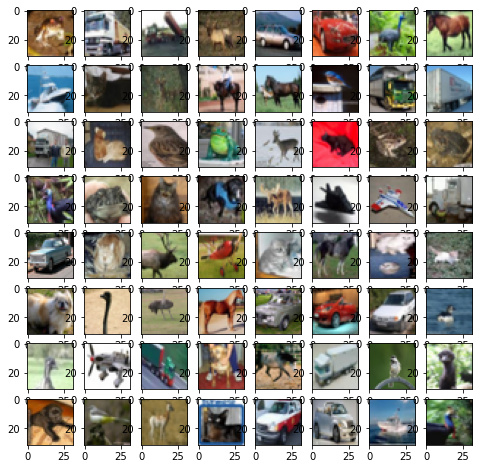

In [9]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()

In [10]:
import numpy as np

x_train = images_train

y_train= cls_train

x_train_flat = x_train.reshape(50000, 3072)

x_train_flat.shape

(50000, 3072)

In [14]:
x_test = images_test

y_test= cls_test

x_test_flat = x_test.reshape(10000, 3072)

x_test_flat.shape

(10000, 3072)

In [15]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
k=0
total= sum(pca.explained_variance_)
current_sum=0
while current_sum/total < 0.98:
    current_sum += pca.explained_variance_[k]
    k+=1
k

444

In [17]:
pca=PCA(n_components=k,whiten=True)
train_transform_data= pca.fit_transform(x_train_flat)
train_transform_data.shape

(50000, 444)

In [18]:
test_transform_data=pca.transform(x_test_flat)
test_transform_data.shape

(10000, 444)

In [19]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1= train_test_split(train_transform_data,y_train)
x_train1.shape

(37500, 444)

In [20]:
from sklearn import svm

In [ ]:
clf_SVC = svm.SVC()
clf_SVC.fit(x_train1,y_train1)
clf_SVC.score(x_test1,y_test1)

In [ ]:
#clf_svm=  svm.SVC()
#clf_svm.fit(train_transform_data,y_train)
#y_pred= clf_svm.predict(test_transform_data)
#y_pred

In [ ]:
import numpy as np
import pandas as pd

# example : y_pred= np.array([0,1,2,1])
df= pd.DataFrame(y_pred)

def getString(inte):
    if inte ==0:
        return 'airplane'
    elif inte==1:
        return 'automobile'
    elif inte==2:
        return 'bird'
    elif inte==3:
        return 'cat'
    elif inte==4:
        return 'deer'
    elif inte==5:
        return 'dog'
    elif inte==6:
        return 'frog'
    elif inte==7:
        return 'horse'
    elif inte==8:
        return 'ship'
    else:
        return 'truck'
    
for i in range(len(y_pred)):
    df[0][i]= getString(df[0][i])

In [ ]:
df.to_csv("cifar10predictions_SVM.csv",header=False,index=False)